In [64]:
%matplotlib inline
import pandas as pd
import geopandas as gp
import numpy as np
import os

from shapely.geometry import Point
from geopandas.tools import sjoin

PARQA = os.getenv('PARQA')

In [65]:
def toGeoDataFrame(df, lat='lat',lon='lon'):
    '''dataframe to geodataframe'''
    df[lat].replace(0, np.nan)
    df[lon].replace(0, np.nan)
    df = df[pd.notnull(df[lat])]

    df['geometry'] = df.apply(lambda z: Point(z[lon], z[lat]), axis=1)
    df = gp.GeoDataFrame(df)
    df.crs = {'init': 'epsg:4326', 'no_defs': True}
    return df

In [66]:
df = pd.read_csv(PARQA + '/data/DPR_property/beaches.csv', index_col=0, encoding='utf-8')

In [67]:
df.columns
df = df.rename(columns={'Name':'NAME'})

In [68]:
# df = geocodeDF(df,'ADDRESS')

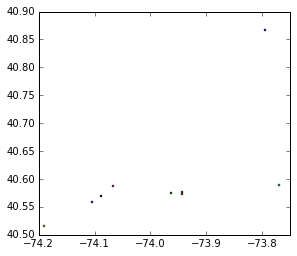

In [69]:
df = toGeoDataFrame(df)
df.plot()

In [70]:
df.NAME

0                          Orchard Beach and Promenade
1                                      Manhattan Beach
2              Coney Island and Coney Island Boardwalk
3                         Rockaway Beach and Boardwalk
4                                          South Beach
5                                   Wolfe's Pond Beach
6    Midland Beach and Franklin D. Roosevelt Boardwalk
7                                    Cedar Grove Beach
8                                       Brighton Beach
Name: NAME, dtype: object

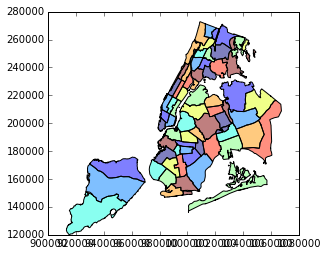

In [71]:
pDistricts = gp.read_file(PARQA + 'data/SHP/Park_Districts/ParkDistrict.shp')
pD = pDistricts[['SYSTEM','geometry']]
pD.plot()

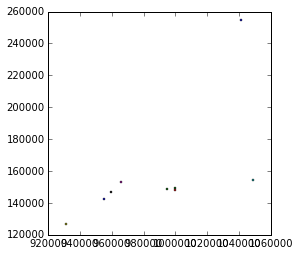

In [72]:
df = df.to_crs(pDistricts.crs)
df.plot()

In [76]:
dfD = sjoin(df, pD, how="left").rename(columns={'SYSTEM':'parkDistrict'}).to_crs(epsg=4326)

In [77]:
len(dfD[pd.isnull(dfD.parkDistrict)])

2

In [78]:
dfD[pd.isnull(dfD.parkDistrict)].NAME

2    Coney Island and Coney Island Boardwalk
3               Rockaway Beach and Boardwalk
Name: NAME, dtype: object

In [79]:
dfD.ix[2, 'parkDistrict'] = 'B-13'
dfD.ix[3, 'parkDistrict'] = 'Q-14'
# dfD.loc[dfD.name=='Coney Island and Coney Island Boardwalk']['parkDistrict']='B-13'
# dfD.loc[dfD.name=='Rockaway Beach and Boardwalk']['parkDistrict']='Q-14'

In [80]:
def writeGeoJson(gdf,path):
    '''writes df as json'''
    with open(path,'w') as jsFile:
        jsFile.write(gdf.to_json())

In [81]:
writeGeoJson(dfD, PARQA +'data/DPR_property/csv_ll_pD/beaches_pd_ll_2.geojson')